# t-test on spectral slope between ya and oa

This notebook computes a simple t-test between the younger adults and older adults regarding their spectral slopes.

$$
H_0: \mu(YA_{slope}) = \mu(OA_{slope})
$$

$$
H_a: \mu(YA_{slope}) < \mu(OA_{slope})
$$

In [6]:
%matplotlib inline
import os
import glob
import seaborn
import csv as csv
import numpy  as np
import scipy  as sp
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('../data/pipeline-20s-eyesc/ya-oa-slope-matrix.csv', index_col=0)

young_adults = df[df['CLASS'].isin(['DANE'])]
older_adults = df[df['CLASS'].isin(['MCI', 'MCI_Control', 'SA_Control'])]

df.head()

,SUBJECT,CLASS,AGE,SEX,AVG_PSD_SLOPE,A1,A2,A3,A4,A5,...,B26,B27,B28,B29,B30,FRONTAL,LTEMPORAL,CENTRAL,RTEMPORAL,OCCIPITAL
0,127101,SA_Control,80.84873,2.0,-5.804659,-6.207339,-6.006881,-5.004732,-6.249184,-7.848450,...,-4.748383,-5.950079,-6.606615,-5.917265,-4.766720,-6.458774,-6.633731,-7.051571,-6.169163,-5.433811
1,127102,MCI_Control,71.89870,1.0,-5.854608,-6.475066,-6.151471,-6.517301,-6.380120,-5.964319,...,-4.621796,-5.606016,-6.762557,-5.917265,-4.285510,-6.458774,-6.737865,-6.479462,-6.818404,-5.433811
2,127103,MCI_Control,69.43463,2.0,-2.606542,-2.343221,-2.556968,-2.007683,-0.922110,-2.570165,...,-0.981276,-2.358701,-3.011193,-2.159953,-1.578591,-0.696107,-4.134891,-4.065552,-3.002314,0.712028
3,127104,SA_Control,83.61396,2.0,-5.387849,-4.666144,-3.645240,-4.136069,-3.626828,-4.693491,...,-5.393366,-4.729700,-4.507910,-4.547847,-5.036724,-3.482842,-4.028538,-6.004186,-7.831297,-4.690516
4,127105,SA_Control,80.69541,2.0,-4.915307,-4.253528,-4.358633,-5.077860,-4.276687,-4.318121,...,-5.109961,-5.684171,-5.320151,-5.582867,-6.150030,-4.585814,-5.216128,-5.562051,-5.251369,-6.189279


In [62]:
for ch in young_adults.loc[:, 'AVG_PSD_SLOPE':'OCCIPITAL']:
    result = stats.ttest_ind(young_adults[ch], older_adults[ch], equal_var=False)
    if result[1] < 0.05:
        print("\t{}: {}, {}".format(ch, result[0], result[1]))
    else:
        print("{}: {}, {}".format(ch, result[0], result[1]))

AVG_PSD_SLOPE: 0.7414846569599606, 0.4608836748734345
A1: 0.1597351065778298, 0.8735222920683353
A2: 0.5733694255752531, 0.5682784939413211
A3: 0.19524745398812463, 0.8457749519932944
A4: 0.428307799179612, 0.6696863001756269
A5: 1.0723646192714853, 0.28695389033669966
A6: 0.030451560548216402, 0.9757850251391449
A7: -0.004357650813196908, 0.9965344612082685
A8: -0.11635403295829762, 0.9076980248092712
A10: -0.08537153344066568, 0.9322398560084846
A11: 0.12013258975933491, 0.9046931333035328
A12: 1.4365842026360234, 0.15506078587523878
A13: 1.444000418066717, 0.1529934505017356
A14: 1.8041819280311795, 0.07517716064319838
A15: 1.4683597692894466, 0.1462549099716641
	A16: 2.3751018523063494, 0.020305071769785715
A17: 1.0457511217044273, 0.2990136479417533
A18: 0.0861746013011796, 0.931556142711104
A21: -0.7039526715623664, 0.4837198043405707
A22: 1.3743016165134165, 0.1733543406170976
	A23: 2.2589637660363335, 0.02726175910519117
A24: 1.7386073221090155, 0.08657945144054528
	A25: 2.2206

In [32]:
scipy.stats.spearmanr(young_adults['Age'], young_adults['occipital'])

SpearmanrResult(correlation=-0.15881020732067122, pvalue=0.30907017231797501)

In [33]:
scipy.stats.spearmanr(df['Age'], df['occipital'])

SpearmanrResult(correlation=0.12321118961593842, pvalue=0.2292296370992653)

In [37]:
np.corrcoef(df['Age'], df['occipital'])

array([[ 1.        ,  0.16308472],
       [ 0.16308472,  1.        ]])

In [38]:
np.corrcoef(young_adults['Age'], young_adults['occipital'])

array([[ 1.        , -0.13916293],
       [-0.13916293,  1.        ]])

In [67]:
print(scipy.stats.pearsonr(young_adults['AGE'], young_adults['OCCIPITAL']))
print(scipy.stats.spearmanr(young_adults['AGE'], young_adults['OCCIPITAL']))

(-0.10284327183705144, 0.51165701802149144)
SpearmanrResult(correlation=-0.13699936339680222, pvalue=0.3810117813962407)


In [41]:
for ch in young_adults.loc[:, 'A1':'occipital']:
    result = np.corrcoef(young_adults['Age'], young_adults[ch])[1,0]
    print(result)

-0.0998750417957
-0.182872041616
-0.0144972447208
-0.273780429099
-0.111759363584
0.0315386769857
0.0172933268974
0.0341389225194
0.0694867889992
-0.0770388662262
0.0267530326301
-0.0151808161241
-0.11354235693
-0.154426130005
-0.104604168421
0.0322621026869
0.0654108093851
0.109315709529
-0.0756056478209
-0.0785660023486
-0.0666115873323
-0.180708045645
-0.066958919118
0.0271956641917
-0.0100934441236
-0.0694731849478
-0.186197627426
-0.137127150019
-0.173801957736
-0.184977066416
-0.132097390453
-0.115262591974
-0.020552669428
-0.0773353487585
-0.170305395245
-0.120416604279
-0.130521510602
-0.315883874025
-0.11288142858
0.0748955011145
-0.0184846759403
-0.202698802203
-0.351049544494
-0.184051347032
-0.18490351632
-0.143036364873
0.00266851108463
0.121696744429
0.0809361840218
-0.00921018419458
-0.249882574283
-0.0817300431036
-0.144192187485
-0.181320925494
-0.0243068603526
-0.224021447481
-0.0469484487723
-0.13916293287


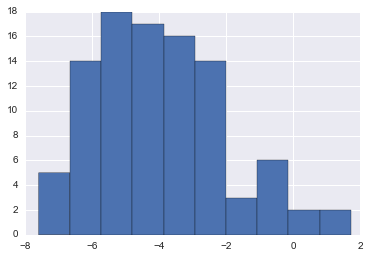

In [49]:
a, b, c = plt.hist(df['frontal'])